In [1]:
import os
import numpy as np
import pickle
import random

'''
Note:  This code is just a hint for people who are not familiar with text processing in python. There is no obligation to use this code, though you may if you like. 
'''


def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    # For python 3 users: use the following instead
    words = list(filter(None, words))
#     words = filter(None, words)
    return words
	
###############################################
######## YOUR CODE STARTS FROM HERE. ##########
###############################################

def shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "data/pos"
    neg_path = "data/neg"
    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)
    review = pos_review + neg_review
    random.shuffle(review)
'''
Now you have read all the files into list 'review' and it has been shuffled.
Save your shuffled result by pickle.
*Pickle is a useful module to serialize a python object structure. 
*Check it out. https://wiki.python.org/moin/UsingPickle
'''

"\nNow you have read all the files into list 'review' and it has been shuffled.\nSave your shuffled result by pickle.\n*Pickle is a useful module to serialize a python object structure. \n*Check it out. https://wiki.python.org/moin/UsingPickle\n"

In [2]:
pos_path = "data/pos"
neg_path = "data/neg"
pos_review = folder_list(pos_path,1)
neg_review = folder_list(neg_path,-1)
review = pos_review + neg_review
random.shuffle(review)

In [3]:
training= review[:1500]
validation = review[1500:2000]

In [4]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale

In [5]:
x_train = [item[0:-1] for item in training]
y_train = [item[-1] for item in training]
x_val = [item[0:-1] for item in validation]
y_val = [item[-1] for item in validation]

X_train=[]
from collections import Counter
for i in range(len(x_train)):
    cnt_train = Counter()
    for word in x_train[i]:
        cnt_train[word] += 1
    X_train.append(cnt_train)
X_val=[]
for i in range(len(x_val)):
    cnt_val = Counter()
    for word in x_val[i]:
        cnt_val[word] += 1
    X_val.append(cnt_val)


In [29]:
def pegaso_algo(x,y,lambda_reg, max_epoch):
    w={}
    epoch = 0
    t=0
    while epoch < max_epoch:
        for j in range(len(x)):
            t+=1
            eta_t = 1/(t*lambda_reg)
            increment(w, -eta_t*lambda_reg, w)
            if y[j]*dotProduct(w,x[j])<1:
                increment(w,eta_t*y[j],x[j])
        epoch+=1
    return w

In [ ]:
import time
start_time=time.time()
w_=pegaso_algo(X_train,y_train,lambda_reg=0.1,max_epoch=6)
end_time=time.time()
print(end_time-start_time)

In [30]:
def pegaso_algo_fast(x,y,lambda_reg, max_epoch):
    W={}
    s=1
    epoch = 0
    t=1
    while epoch < max_epoch:
        for j in range(len(x)):
            t+=1
            eta = 1/(lambda_reg*t)
            s += -eta*lambda_reg*s
            if y[j]*dotProduct(W,x[j])*s<1:
                increment(W,(1/s)*eta*y[j],x[j])
        epoch+=1
    W.update((x,s*y) for x,y in W.items())
    return W

In [31]:
import time
start_time_1=time.time()
w_=pegaso_algo(X_train,y_train,lambda_reg=0.1,max_epoch=6)
end_time_1=time.time()
print(end_time_1-start_time_1)
start_time=time.time()
w_fast=pegaso_algo_fast(X_train,y_train,lambda_reg=0.1,max_epoch=6)
end_time=time.time()
print(end_time-start_time)

86.05832195281982
1.481337070465088


In [32]:
w_fast

{'after': 0.061104321742028414,
 'being': 0.06221530941006534,
 'hypnotized': 0.004443950672147538,
 'a': -0.048883457393622806,
 'man': -0.006665926008221415,
 'believes': 0.015553827352516371,
 'there': -0.07332518609043424,
 'is': 0.032218642373070074,
 'ghost': 0.004443950672147544,
 'in': 0.009998889012331981,
 'his': 0.004443950672147685,
 'house': -0.04110654371736467,
 'the': 0.018886790356627027,
 'review': -0.04555049438951227,
 'two': -0.03444061770914346,
 'lowkey': 0.014442839684479479,
 'summer': -0.019997778024663765,
 'horror': 0.018886790356627024,
 'films': 0.06777024775024969,
 'have': -0.14998333518497972,
 'become': 0.04666148205754908,
 'surprise': 0.05666037106988106,
 'financial': -0.008887901344295067,
 'successes': -0.012220864348405708,
 'this': -0.11220975447172511,
 'year': 0.06332629707810229,
 'blair': -0.02777469170092198,
 'witch': -0.018886790356626937,
 'project': -0.03888456838129082,
 'and': 0.14553938451283255,
 'sixth': 0.05666037106988107,
 'sens

In [33]:
w_

{'after': 0.06111111111111102,
 'being': 0.062222222222222415,
 'hypnotized': 0.004444444444444458,
 'a': -0.04888888888888875,
 'man': -0.006666666666666767,
 'believes': 0.015555555555555477,
 'there': -0.07333333333333407,
 'is': 0.032222222222222235,
 'ghost': 0.004444444444444446,
 'in': 0.010000000000000021,
 'his': 0.004444444444444669,
 'house': -0.04111111111111116,
 'the': 0.018888888888888414,
 'review': -0.04555555555555563,
 'two': -0.034444444444444326,
 'lowkey': 0.014444444444444463,
 'summer': -0.020000000000000025,
 'horror': 0.01888888888888892,
 'films': 0.06777777777777717,
 'have': -0.1499999999999993,
 'become': 0.0466666666666666,
 'surprise': 0.05666666666666668,
 'financial': -0.008888888888888889,
 'successes': -0.012222222222222252,
 'this': -0.11222222222222214,
 'year': 0.06333333333333344,
 'blair': -0.027777777777777936,
 'witch': -0.018888888888888934,
 'project': -0.03888888888888882,
 'and': 0.14555555555555433,
 'sixth': 0.056666666666666816,
 'sense

In [12]:
def evaluate(w,x,y):
    error = 0
    for i in range(len(x)):  
        if dotProduct(w, x[i])<0:
            prediction = -1
        else:
            prediction = 1
        if y[i] !=prediction:
            error+=1
    return error/len(x)

In [13]:
lambda_regs=[1e-4,5e-4,1e-3,2.5e-3,5e-3,1e-2,2.5e-2,5e-2]
w_l=[]
for lambda_reg in lambda_regs:
    w=pegaso_algo_fast(X_train,y_train,lambda_reg=lambda_reg, max_epoch=6)
    w_l.append(w)
losses=[]
for w in w_l:
    loss=evaluate(w, X_val, y_val)
    losses.append(loss)

In [14]:
losses

[0.198, 0.198, 0.202, 0.17, 0.252, 0.158, 0.17, 0.194]

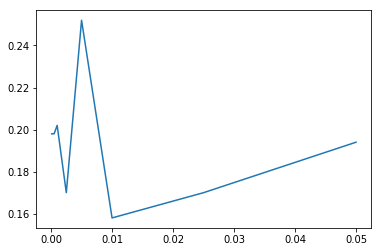

In [16]:
import matplotlib.pyplot as plt
plt.plot(lambda_regs,losses)

In [34]:
def misclassify(w,x,y):
    l=[]
    for i in range(len(x)):  
        if dotProduct(w, x[i])<0:
            prediction = -1
        else:
            prediction = 1
        if y[i] !=prediction:
            l.append(x[i])
    return l
w_opt=pegaso_algo_fast(X_train,y_train,lambda_reg=0.01, max_epoch=6)
ex1=misclassify(w_fast,X_val,y_val)[0]
ex2=misclassify(w_fast,X_val,y_val)[1]
example_1={k : v * ex1[k] for k, v in w_opt.items() if k in ex1}
example_2={k : v * ex2[k] for k, v in w_opt.items() if k in ex2}
from collections import OrderedDict
def keyfunc(t):
    return abs(t[1])

example_1 = OrderedDict(sorted(example_1.items(), key=keyfunc, reverse=True))
example_2 = OrderedDict(sorted(example_2.items(), key=keyfunc, reverse=True))

In [38]:
example_2

OrderedDict([('and', 12.798577935785037),
             ('only', -9.821130985446063),
             ('jackie', 8.610154427285835),
             ('the', 8.432396400400025),
             ('that', -8.13242973002997),
             ('on', -6.777024775024982),
             ('i', 5.599377846905893),
             ('he', 5.5549383401844254),
             ('of', -5.510498833462885),
             ('chan', 4.599488945672686),
             ('have', -4.3550716587046185),
             ("it's", 4.332851905343834),
             ('see', 4.221753138540156),
             ('as', 3.8662370847683616),
             ('a', -3.666259304521699),
             ('bad', -3.655149427841354),
             ('but', -3.344072880791026),
             ('movie', -2.999666703699586),
             ('this', -2.977446950338851),
             ('it', 2.844128430174422),
             ('any', -2.644150649927783),
             ('if', -2.488612376402619),
             ('in', 2.4441728696811458),
             ('who', 2.4441728696811342),

In [21]:
example_1=dict(example_1)
example_2=dict(example_2)

In [40]:
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_1['and'], ex1['and'], w_opt['and']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_1['on'], ex1['on'], w_opt['on']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_1['in'], ex1['in'], w_opt['in']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_1['that'], ex1['that'], w_opt['that']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_1['have'], ex1['have'], w_opt['have']))

w_i_x_i:7.199200088879083
x_i: 9 
w_i: 0.7999111209865648
w_i_x_i:-6.777024775024982
x_i: 5 
w_i: -1.3554049550049965
w_i_x_i:5.3771803132985205
x_i: 11 
w_i: 0.48883457393622914
w_i_x_i:-4.7439173425174825
x_i: 7 
w_i: -0.6777024775024976
w_i_x_i:-4.3550716587046185
x_i: 4 
w_i: -1.0887679146761546


In [39]:
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_2['and'], ex2['and'], w_opt['and']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_2['only'], ex2['only'], w_opt['only']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_2['jackie'], ex2['jackie'], w_opt['jackie']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_2['the'], ex2['the'], w_opt['the']))
print("w_i_x_i:{}\nx_i: {} \nw_i: {}".format(example_2['that'], ex2['that'], w_opt['that']))

w_i_x_i:12.798577935785037
x_i: 16 
w_i: 0.7999111209865648
w_i_x_i:-9.821130985446063
x_i: 4 
w_i: -2.4552827463615157
w_i_x_i:8.610154427285835
x_i: 5 
w_i: 1.722030885457167
w_i_x_i:8.432396400400025
x_i: 33 
w_i: 0.2555271636484856
w_i_x_i:-8.13242973002997
x_i: 12 
w_i: -0.6777024775024976
